ANALISIS EXPLORATORIO DE DATOS (EDA) 
DATASET: METADATA_GOOGLE_MAPS

BIBLIOTECAS UTILIZADAS

In [1]:
#Bibliotecas
from google.cloud import bigquery
import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

DECLARACION DE FUNCIONES

In [2]:
def eval(dato):
    if type(dato) == str:
        return ast.literal_eval(dato)
    else:
        return dato

def extraer(dato):
    global lista_categorias
    if type(dato) == list:
        for elemento in dato:
            lista_categorias.append(elemento)
    
    return dato



VARIABLE DE ENTORNO

In [3]:
#Configura variable de entorno
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "prctica-etl-2af93f84aca1.json"#Credencial

ACCESO A CLIENTE DE BIG QUERY

In [4]:
client = bigquery.Client(location="southamerica-west1", project="prctica-etl")#Acceso al cliente de Big Query

CONSULTA

In [5]:
query = "SELECT * FROM `prctica-etl.GMaps.Metadata`"
df = client.query(query).to_dataframe()

HEAD DE DATAFRAME (VISUALIZACION DE LAS PRIMERAS 5 FILAS)

In [6]:
df.head()

,name,address,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,MISC,platform
0,The Shangri-La Diner,"The Shangri-La Diner, 2201 Cherokee St, St. Lo...",0x87d8b38a42aa231d:0x133da73c8f0781b8,38.593181099999995,-90.2232757,['Restaurant'],1.0,1,"{'Service options': ['Delivery'], 'Accessibili...",Google Maps
1,44 Wing Sauce,"44 Wing Sauce, 3280 Suntree Blvd, Melbourne, F...",0x88de04f62cf8323d:0xb0c0479770009286,28.2294453,-80.67712209999999,"['Chicken wings restaurant', 'Condiments suppl...",1.0,1,"{'Service options': ['Takeout', 'Delivery'], '...",Google Maps
2,Six Below,"Six Below, 1 Great America Parkway, Gurnee, IL...",0x880f91c168e3a6df:0x9fc5a2d90dd90c98,42.3665903,-87.9360492,['Ice cream shop'],1.0,1,"{'Service options': ['Delivery'], 'Highlights'...",Google Maps
3,KFC,"KFC, 638 Chestnut St, Berea, KY 40403",0x8842e197750742ad:0x7b3484207243df9a,37.568424199999995,-84.3057632,"['Chicken restaurant', 'Caterer', 'Fast food r...",1.0,1,"{'Service options': ['Delivery'], 'Amenities':...",Google Maps
4,Padrone's Pizza,"Padrone's Pizza, 271 S Main St, Minster, OH 45865",0x883fae95a5f3babf:0xcecda72f587ed176,40.399539999999995,-84.37717599999999,['Pizza restaurant'],1.0,1,"{'Service options': ['Delivery'], 'Offerings':...",Google Maps


NORMALIZACION DE TIPOS DE DATOS

In [7]:

df.latitude = pd.to_numeric(df.latitude)
df.longitude = pd.to_numeric(df.longitude)
df.avg_rating = pd.to_numeric(df.avg_rating)
df.num_of_reviews = pd.to_numeric(df.num_of_reviews)
df.category = df.category.apply(eval)
df.MISC = df.MISC.apply(eval)


Al estas los DF almacenados en string, se adecuan los tipos de datos de acuerdo a cada campo.

INFORMACION DEL DATAFRAME

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312025 entries, 0 to 312024
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            312025 non-null  object 
 1   address         312025 non-null  object 
 2   gmap_id         312025 non-null  object 
 3   latitude        312025 non-null  float64
 4   longitude       312025 non-null  float64
 5   category        312025 non-null  object 
 6   avg_rating      312025 non-null  float64
 7   num_of_reviews  312025 non-null  int64  
 8   MISC            304694 non-null  object 
 9   platform        312025 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 23.8+ MB


El dataframe contiene 312025 filas, 10 columnas y ocupa 23,8 Mb de memoria RAM

DATOS ESTADISTICOS DE VARIABLES NUMERICAS

In [9]:
df.describe()

,latitude,longitude,avg_rating,num_of_reviews
count,312025.000000,312025.000000,312025.000000,312025.000000
mean,37.591489,-92.368867,4.215271,93.452060
std,5.471543,17.266954,0.579049,256.478278
min,8.750457,-177.378634,1.000000,1.000000
25%,33.828537,-101.712166,3.900000,15.000000
50%,38.761667,-87.647863,4.300000,38.000000
75%,41.351891,-79.010748,4.600000,84.000000
max,71.297292,180.000000,5.000000,9998.000000


Se concluye que todas las variables numericas poseen valores no-nulos en su totalidad. Los datos correspondiente a coordenadas geograficas coinciden en su media a la ubicacion geografica de EEUU. Las desviaciones se encuentran en rangos aceptables en las 4 variables, los maximos y minimos son coherentes. Solo se evidencia una leve cantidad de outliers en las coordenadas geograficas (latitud y longitud)

CAMPOS DEL DATAFRAME:

"NAME"

In [10]:
df.name.value_counts()

name
Subway                           9118
Starbucks                        3380
Domino's Pizza                   1793
Circle K                         1789
Dunkin'                          1710
                                 ... 
Rural Ramen Bar                     1
MOV Catering                        1
Scooby's Sports Bar and Grill       1
Signature Luxe Aesthetics           1
Makai Cafe                          1
Name: count, Length: 225417, dtype: int64

Se observan nombres de locales reiterativos, esto es consistente con la presencia de varias sucursales de un mismo dominio

"ADDRESS"

In [11]:
df.address.value_counts()

address
None                                                                    2303
La Colombe, 8000 Essington Ave, Philadelphia, PA 19153                     3
Downtown Grind, 410 W 4th Ave, Anchorage, AK 99501                         2
Silver Dragon Asian Restaurant, 794 E 14th St, San Leandro, CA 94577       2
Beans & Burritos, 919 Fabens Rd Suite F, Fabens, TX 79838                  2
                                                                        ... 
Papa Murphy's | Take 'N' Bake Pizza, 200 E Main St, Rigby, ID 83442        1
Dunkin, 542 Broad St, Central Falls, RI 02863                              1
Chinese Valley II, 13650 Eastlake Dr Suite 507, El Paso, TX 79928          1
Tasty Bowl, 27741 Crown Valley Pkwy # 321, Mission Viejo, CA 92691         1
Taco Bell, 12240 Hwy 6, Santa Fe, TX 77510                                 1
Name: count, Length: 309530, dtype: int64

Se observa una ausencia de datos sobre direcciones menor al 1% del total (None), se observan direcciones reiterativas, consistente con la existencia de inmuebles que albergan mas de un establecimiento (complejos, galerias, etc)

"GMAP_ID"

In [12]:
df.gmap_id.value_counts()

gmap_id
0x87d8b38a42aa231d:0x133da73c8f0781b8    1
0x89c28579e0300dbb:0x4be3681fa77a3ef4    1
0x8640b992cbd80143:0x79fa453147eba42a    1
0x89c22f8cfd03d319:0x3f9895fb817c35e     1
0x5490051ce1fcb45b:0xf377e42a491e95ea    1
                                        ..
0x549053d9eb2a0711:0xc3c84a35e9873625    1
0x7c07066d69865fef:0x29c21034e4203446    1
0x889387d70c7c2a87:0xdb0e68d26fa76cc1    1
0x89c25909ea33cafb:0x96d4faf325e371a3    1
0x864081b3e7db04a7:0xa3d0f2add6b9a6be    1
Name: count, Length: 312025, dtype: int64

Los datos son unicos para cada fila, no se observa presencia de nulos, cumplen la funcion de identificador unico.

"LATITUDE" y "LONGITUDE"

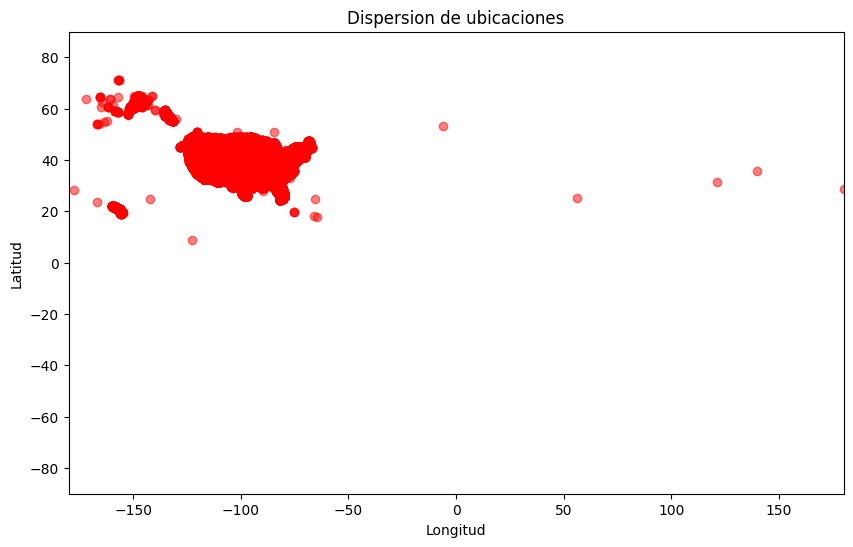

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df.longitude, df.latitude, color='red', alpha=0.5)
plt.title('Dispersion de ubicaciones')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.ylim(-90, 90)
plt.xlim(-180, 180)
plt.tight_layout
plt.show()

Se observa concentracion de coordenadas geograficas dentro del rango de ubicacion de los EEUU, se puede observar una cantidad infima de outliers en las longitudes producto de minimas inconsistencias en el signo de los datos numericos.

"CATEGORY"

In [14]:
lista_categorias = []
df.category.apply(extraer)
print(len(lista_categorias))


753502


Se observa la presencia de 753502 categorias asignadas a los establecimientos

Se hallan 2545 categorias unicas en el dataframe


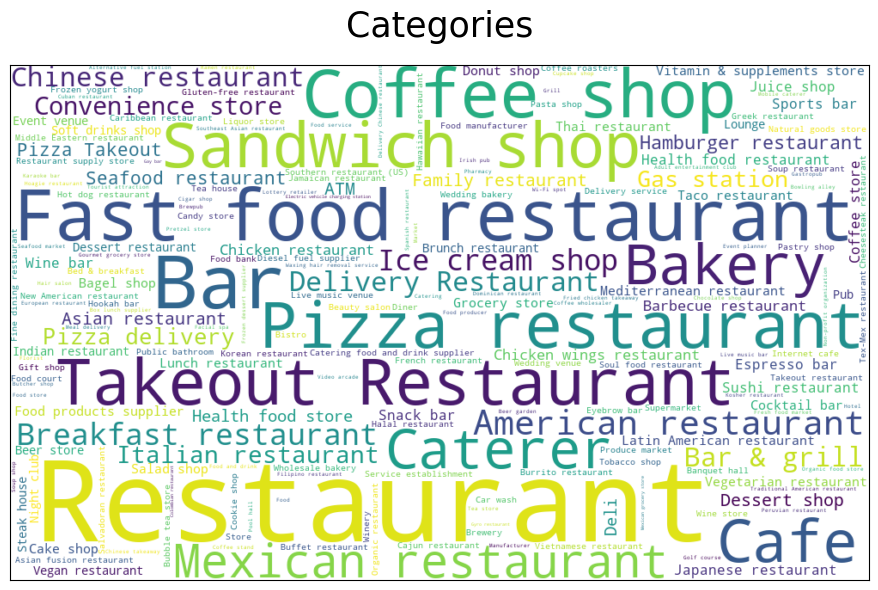

In [15]:
categorias = Counter(lista_categorias)
print(f'Se hallan {len(categorias)} categorias unicas en el dataframe')
wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(categorias)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Categories', fontsize=25, pad=20)
plt.axis('on')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Se observan 2545 categorias unicas en la totalidad de los establecimientos, evidenciandose en la grafica la predominancia de la categoria "Restaurant"

"AVG_RATING"

In [16]:
redondeo = df.avg_rating.astype(int)#Se redondean los puntajes
valores = redondeo.value_counts(ascending=False)
valores

avg_rating
4    214655
3     68683
5     18368
2      8815
1      1504
Name: count, dtype: int64

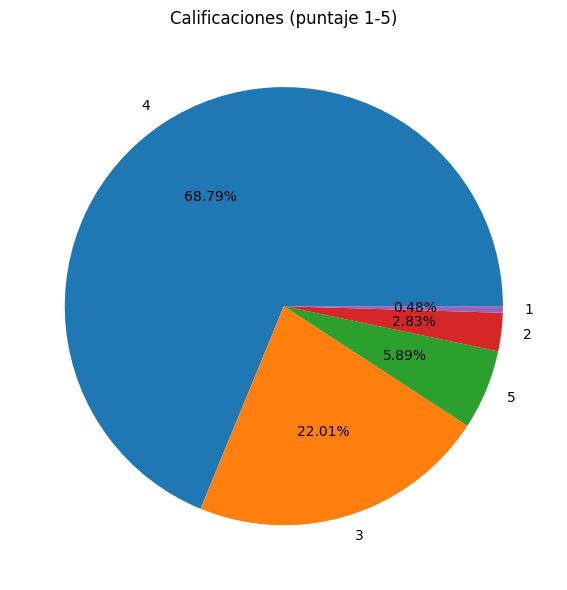

In [17]:
plt.figure(figsize=(10, 6))
plt.pie(valores, labels=valores.index, autopct='%1.2f%%')
plt.title('Calificaciones (puntaje 1-5)')
plt.tight_layout()
plt.show()

Se observa predominancia de los establecimientos con puntajes tendientes a los 4 puntos, siendo el 68,79% de los mismos, seguido por los 3 puntos con el 22,01% del total y los 5 puntos con el 5,89%. No predominan los establecimientos con bajo puntaje.

"NUM_OF_REVIEWS"

In [18]:
print(f'El valor minimo es: {round(df.num_of_reviews.min())}')
print(f'El valor medio es: {round(df.num_of_reviews.mean())}')
print(f'El valor maximo es: {round(df.num_of_reviews.max())}')

El valor minimo es: 1
El valor medio es: 93
El valor maximo es: 9998


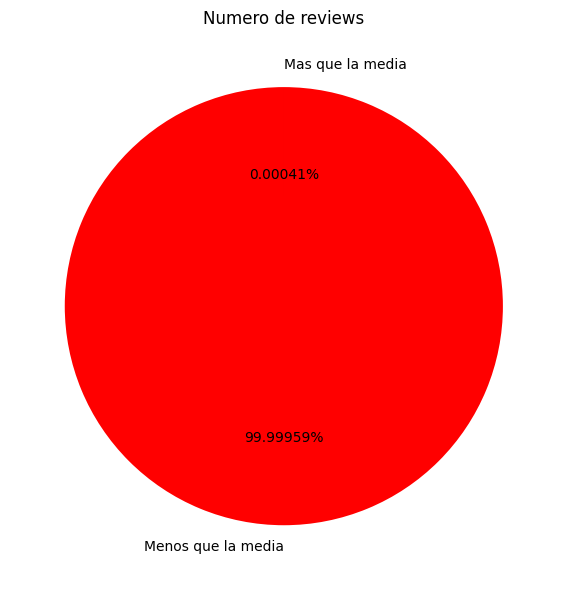

In [19]:

etiquetas = ['Menos que la media', 'Mas que la media']
valores = [len(df[df['num_of_reviews'] <= 93]), len([df[df['num_of_reviews'] > 93]])]
plt.figure(figsize=(10, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.5f%%', startangle=90, colors=['red', 'blue'])
plt.title('Numero de reviews')
plt.tight_layout()
plt.show()

Se puede observar graficamente lo recabado en la informacion estadistica, mas del 99% de los establecimientos poseen cantidad de reviews por debajo de la media.

"MISC"

In [20]:
MISC = df.MISC
MISC = MISC.dropna()
MISC = pd.DataFrame(MISC.tolist())
MISC.head()

,Service options,Accessibility,Offerings,Dining options,Atmosphere,Crowd,Highlights,Planning,Amenities,Popular for,Payments,Health & safety,From the business,Activities,Recycling,Health and safety
0,[Delivery],"[Wheelchair accessible entrance, Wheelchair ac...","[Coffee, Comfort food, Vegetarian options]","[Breakfast, Lunch, Dinner]",[Casual],[Groups],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Takeout, Delivery]",NaN,NaN,NaN,[Casual],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,[Delivery],[Wheelchair accessible entrance],NaN,NaN,NaN,NaN,[Great dessert],[Quick visit],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,[Delivery],NaN,NaN,NaN,NaN,NaN,NaN,NaN,[Good for kids],NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,[Delivery],NaN,[Comfort food],"[Lunch, Dinner]",[Casual],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
MISC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304694 entries, 0 to 304693
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Service options    287101 non-null  object
 1   Accessibility      206599 non-null  object
 2   Offerings          211029 non-null  object
 3   Dining options     140061 non-null  object
 4   Atmosphere         181514 non-null  object
 5   Crowd              147801 non-null  object
 6   Highlights         115105 non-null  object
 7   Planning           60133 non-null   object
 8   Amenities          201131 non-null  object
 9   Popular for        145736 non-null  object
 10  Payments           113950 non-null  object
 11  Health & safety    70290 non-null   object
 12  From the business  12857 non-null   object
 13  Activities         5 non-null       object
 14  Recycling          79 non-null      object
 15  Health and safety  8394 non-null    object
dtypes: object(16)
memory

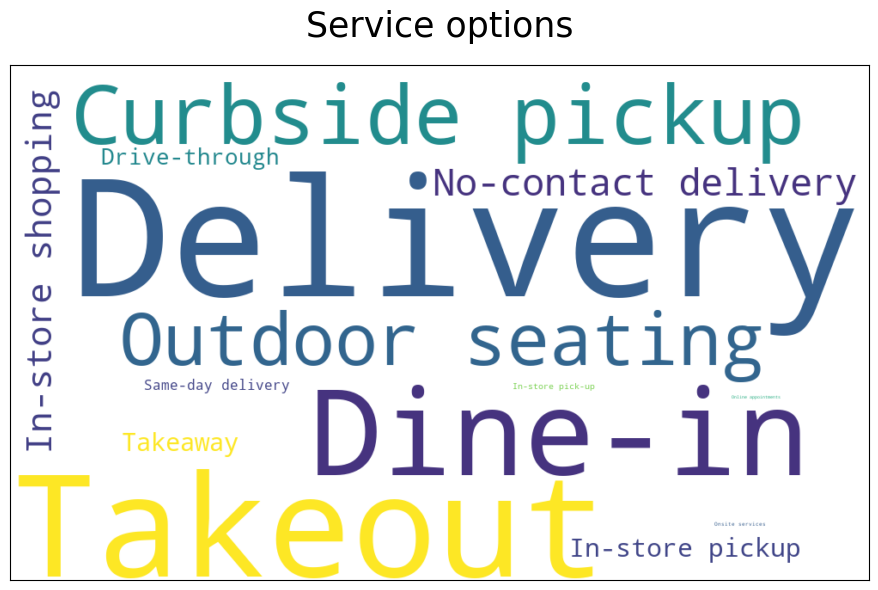

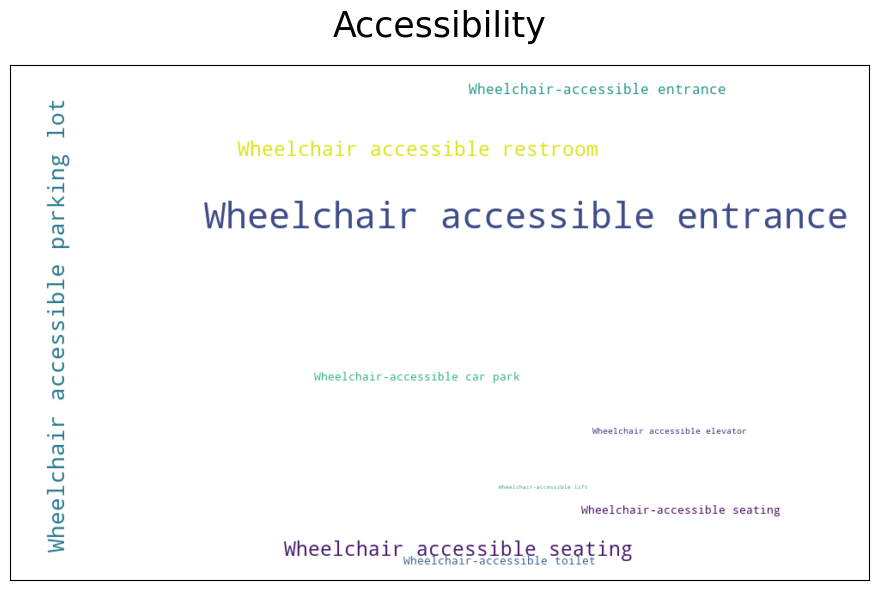

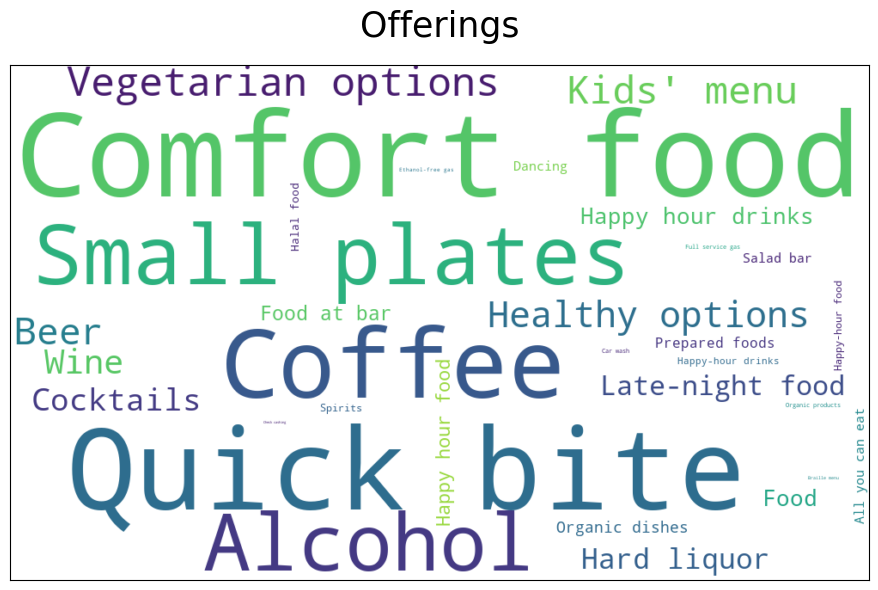

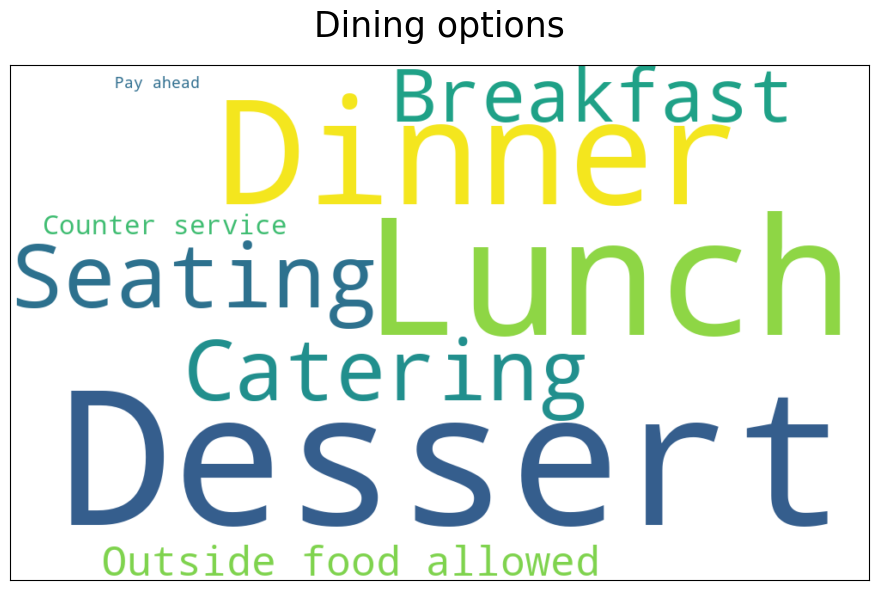

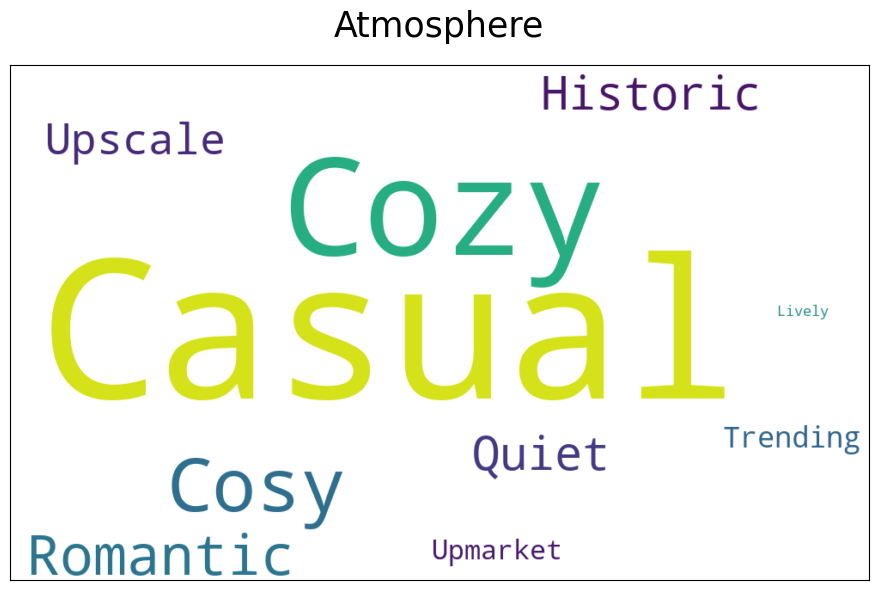

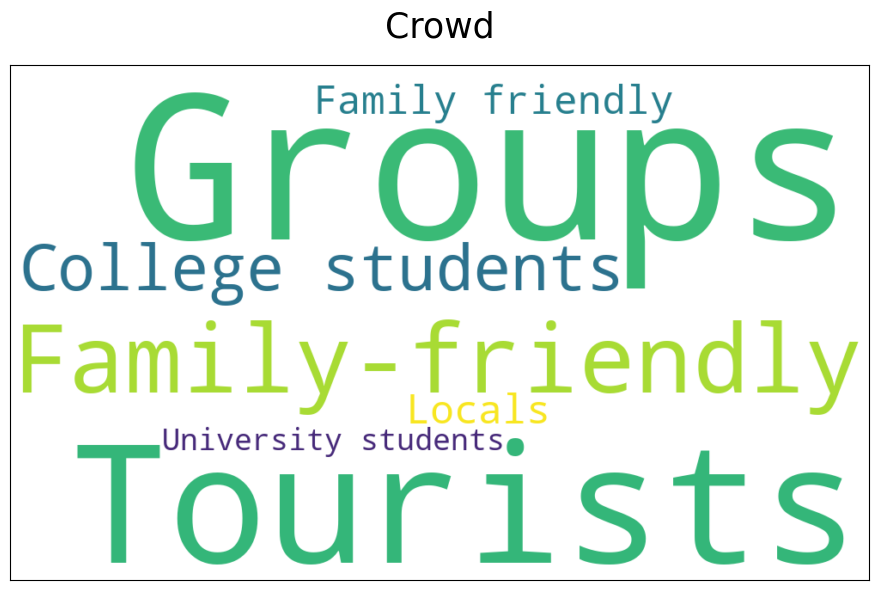

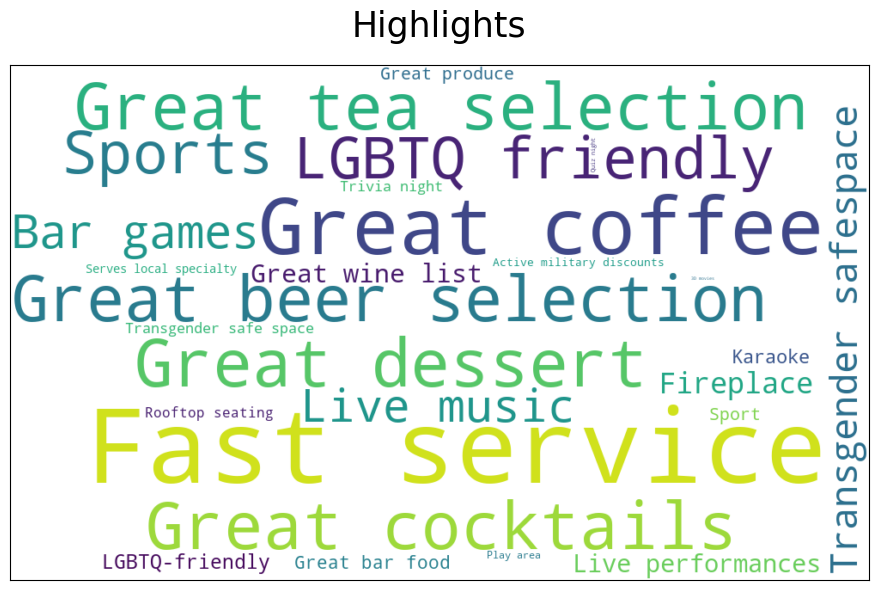

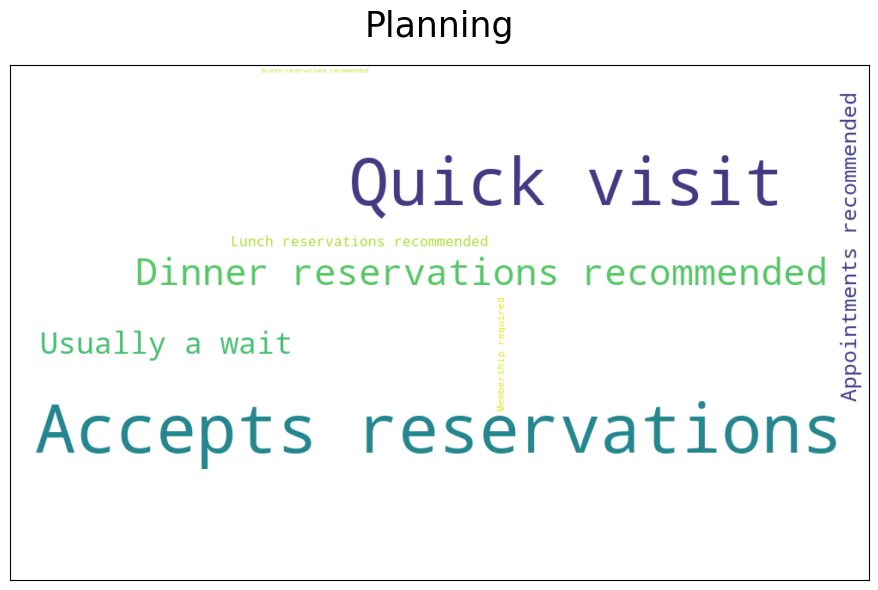

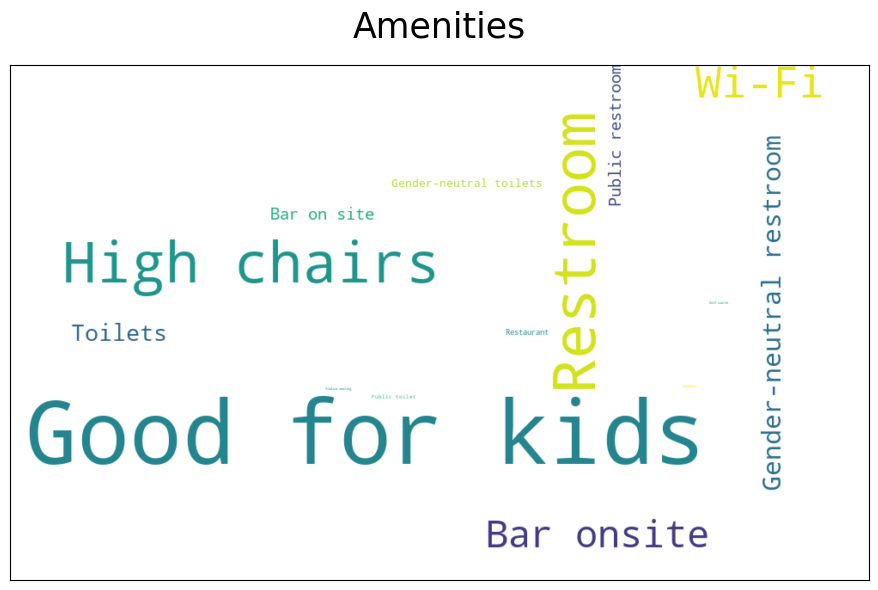

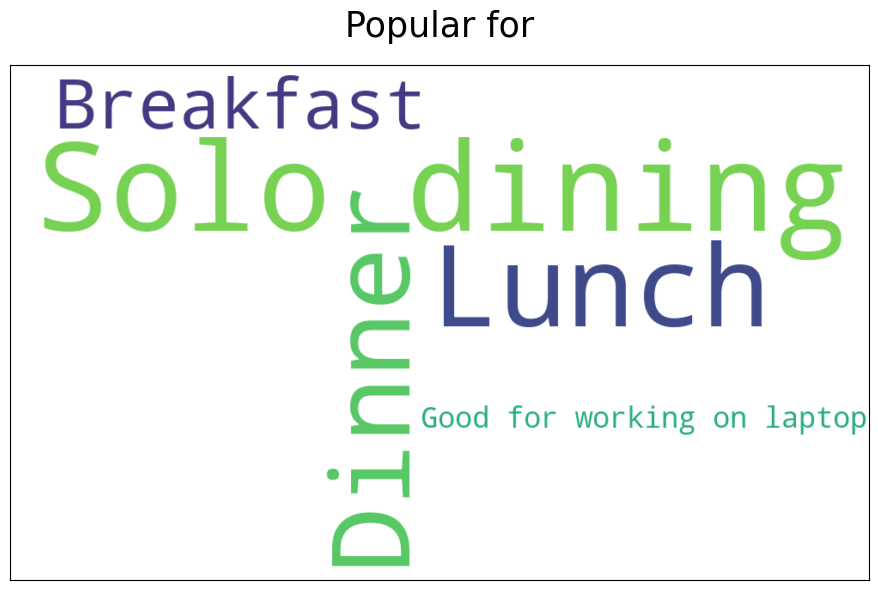

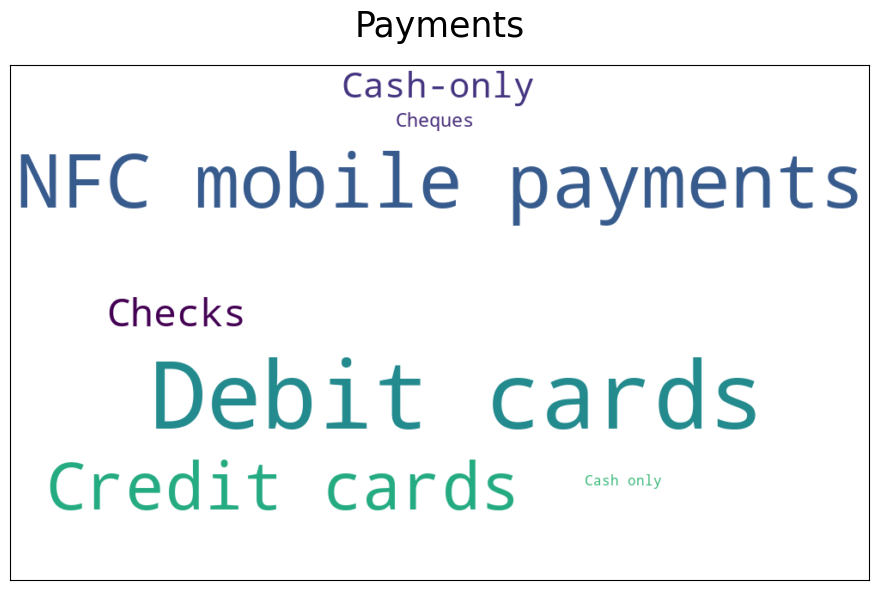

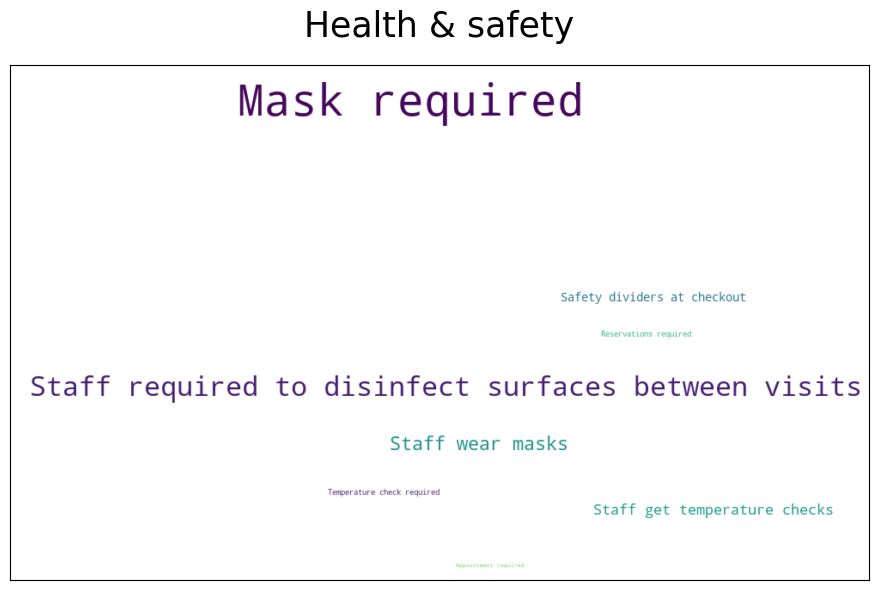

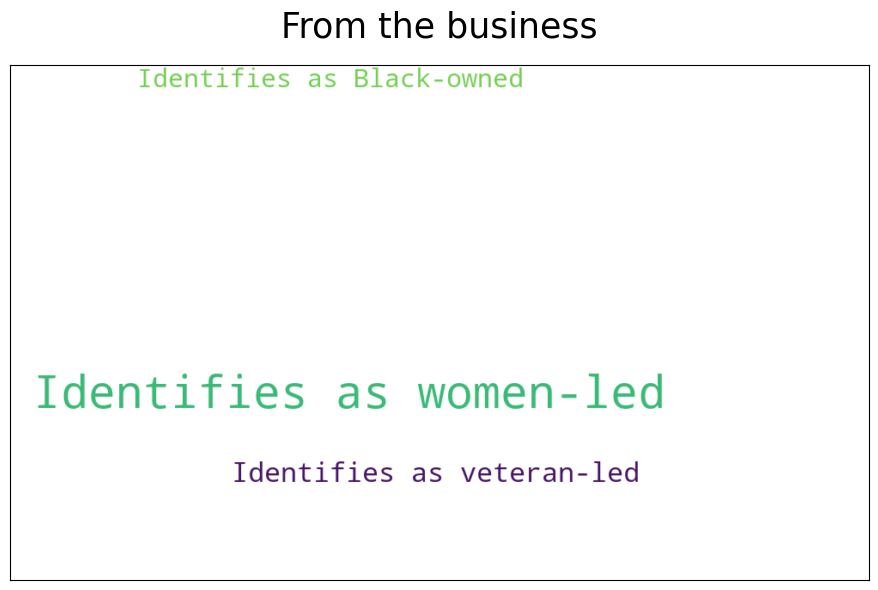

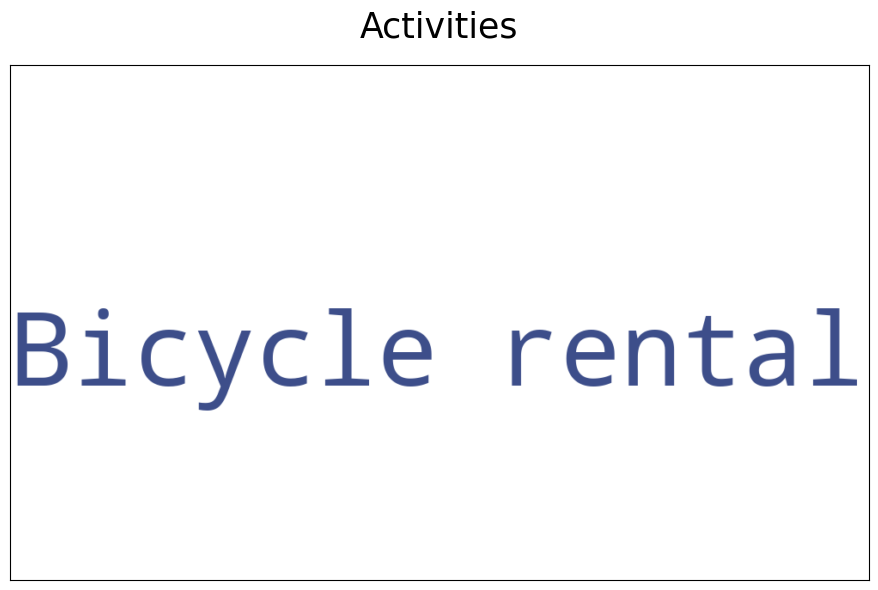

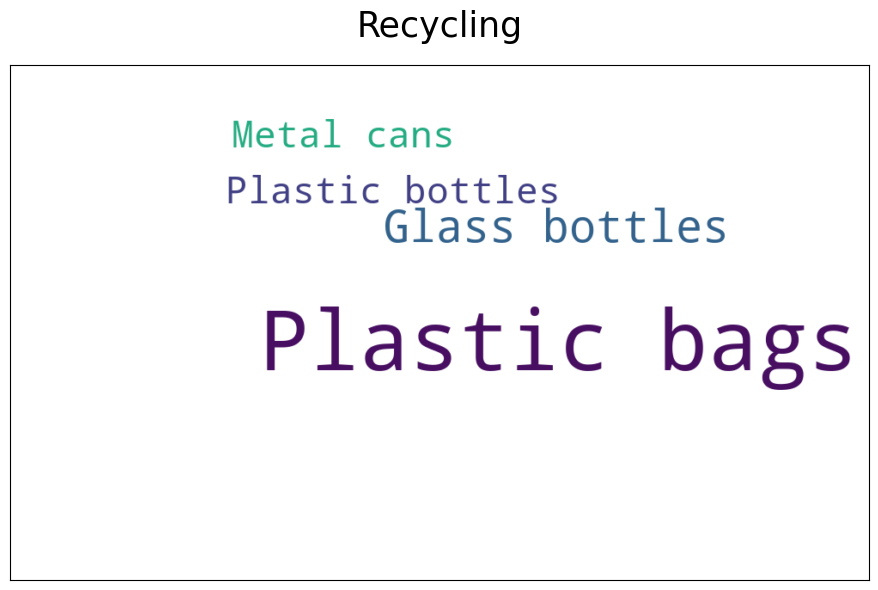

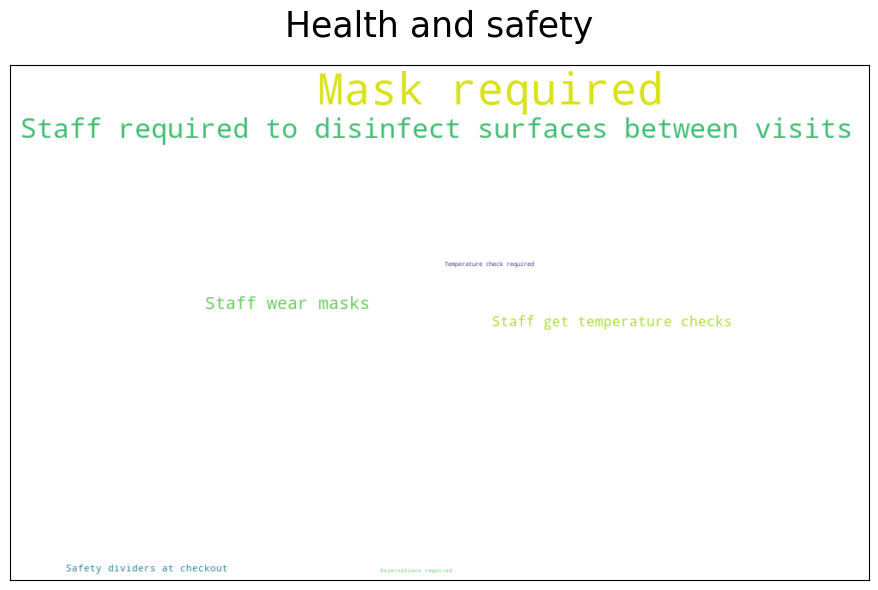

In [22]:
for elemento in MISC.columns:
    MISC[elemento] = MISC[elemento].apply(eval)
    lista_categorias = []
    MISC[elemento].apply(extraer)
    elementos = Counter(lista_categorias)
    wordcloud = WordCloud(width=1000, height=600, background_color='white').generate_from_frequencies(elementos)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{elemento}', fontsize=25, pad=20)
    plt.axis('on')
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.show()

Este campo contiene miscelaneas, es decir caracteristicas adicionales acerca de cada establecimiento. 
Opciones de servicios: Predomina el servicio de delivery.
Accesibilidad: Predomina el acceso para sillas de ruedas.
Ofertas: Predomina la opcion de comida rapida.
Opciones de Cena: Predominan los postres.
Ambiente: Predomina el casual.
Asistentes: Predominan grupos y turistas.
Planning: Predominan los que aceptan reservas y visitas rapidas.
Ammenities: Predominan los espacios para niños.
Popularidad: Predominan los que ofrecen solo cena.
Forma de pago: Predominan aplicaciones moviles y tarjeta de debito.
Salud y seguridad: PRedominan los que exigen mascara (epoca de pandemia).
Identificacion de negocio: Predominan los liderados por mujeres.
Actividades complementarias: Predomina el alquiler de bicicletas.
Reciclables: Predominan las bolsas de plastico.

"PLATFORM"

In [23]:
df.platform.value_counts()

platform
Google Maps    312025
Name: count, dtype: int64

Este campo hace alusion a que el establecimiento esta registrado en google maps, tiene solo un valor